## DATA ANALYSIS

Here we gonna 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import LabelPowerset
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import sklearn
import numpy as np 
import warnings
import pandas as pd   
from ast import literal_eval
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
import nltk
import time
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Filter out specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [51]:
df = pd.read_csv("train.csv", header=0, index_col=0)
df.head()

,Title,Abstract,Categories
Id,,,
9707,Axiomatic Aspects of Default Inference,This paper studies axioms for nonmonotonic con...,['cs.LO']
24198,On extensions of group with infinite conjugacy...,We characterize the group property of being wi...,['math.GR']
35766,An Analysis of Complex-Valued CNNs for RF Data...,Recent deep neural network-based device classi...,"['cs.LG', 'cs.IT', 'eess.SP', 'math.IT']"
14322,On the reconstruction of the drift of a diffus...,The problem of reconstructing the drift of a d...,"['math.PR', 'math.ST', 'stat.TH']"
709,Three classes of propagation rules for GRS and...,"In this paper, we study the Hermitian hulls of...","['cs.IT', 'math.IT']"


In [52]:
len(df["Title"])

51210

In [3]:
target_cols = ["math.AT", "stat.AP", "cs.AR", "math.QA", "q-bio.MN", "eess.AS", "eess.IV", "stat.ME", "econ.GN", "eess.SP", 
               "q-fin.RM", "cs.LG", "cs.CR", "q-bio.BM", "q-fin.GN", "q-fin.MF", "q-fin.PR", "math.CV", "cs.LO", "econ.TH", 
               "math.CO", "cs.AI", "math.AC", "q-bio.CB", "q-fin.CP", "cs.CL", "cs.DC", "math.LO", "math.NT", "cs.SD", 
               "q-fin.TR", "cs.CV", "stat.ML", "q-fin.EC", "econ.EM", "cs.CE", "stat.CO", "math.PR", "q-bio.NC", "math.AP", 
               "cs.OS", "cs.NI", "cs.IT", "cs.PL", "cs.GT", "cs.DM", "math.IT", "cs.SE", "cs.RO", "stat.TH", "cs.DB", 
               "math.ST", "q-bio.GN", "q-fin.PM", "q-bio.TO", "math.GR", "cs.IR"]

In [4]:

nltk.download('stopwords')
nltk.download('wordnet')
# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


custom_stopwords = [
        "ability", "able", "absolute", "absolutely", "account", "accurate", "achieve", "address",
        "allowing", "also", "analyze", "analyzes", "answer", "application", "approach",
        'any','apply','applying','reapplying','given','papers','paper','about','results','result','real','world',
        'page','article','present','takes','account', 'previous','work','propose','proposes','proposed','simply',
        'simple','demonstrate','demonstrated','demonstrates','realworld','datasets','dataset','provide','important',
        'research','researchers','experiments','experiment','unexpected','discovering','using','recent','collected',
        'solve','columns','existing','traditional','final','consider','presented','provides','automatically','extracting',
        'including','help','helps','explore','illustrate','achieve','better',
        "around", "article", "aspect", "audience", "author", "available", "based", "begin", "best", "better",
        "beyond", "bound", "brief", "called", "capable", "capture", "carefully", "case", "certain", "challenging",
        "compare", "complex", "component", "comprehensive", "concept", "conceptual",
        "conclusion", "condition", "conduct", "conjecture", "consider", "construct", "content", "context", "cost",
        "cross", "crucial", "current", "demonstrate", "derive", "derived", "describe",
        "described", "describes", "detailed", "determine", "developed", "different", "difficult", "directly",
        "discourse", "discuss", "distinguish", "driven", "due", "effect", "effective", "efficient", "efficiently",
        "eight", "element", "emphasis", "end", "enhanced", "evaluate", "even", "example", "experiment", "experimental",
        "explain", "extensive", "family", "feature", "figure", "find", "fine", "finite", "finitely", "first",
        "fit", "five", "found", "four", "framework", "function", "fundamental", "future", "general", "give",
        "given", "good", "grained", "graph", "group", "handed", "high", "higher", "however", "illustrate", "impact",
        "implement", "important", "include", "included", "integrate", "interest", "introduce", "introduced", "introduction",
        "investigate", "issue", "iteration", "known", "large", "last", "leading", "left", "let", "long", "low", "lower", "make",
        "many", "maximal", "may", "method", "methodology", "minimal", "model", "moreover", "multiple",
        "necessary", "need", "needed", "new", "news", "next", "nine", "non", "note", "novel", "number", "numerical",
        "objective", "observables", "observation", 'obtained', "often", "one", "open", "operator", "optimal", "order",
        "outline",
        "outlines", "output", "paper", "papr", "parameter", "part", "particular", "perform",
        "performance", "performed", "performing", "performance", "phase", "point", "possible",
        "potential", "pre", "precisely", "present", "previous", "principle", "problem", "process", "prof",
        "proof", "proper", "property", "propose", "proposed", "proposes", "prove", "provide", "provided",
        "publicly", "publish", "purpose", "quality", "question", "range", "real", "recent", "recently",
        "recommendation", "related", "reliable", "representation", "require", "research", "result", "rev", "review",
        "right", "rigorous", "role", "scale", "scenario", "second", "section", "selection", "series", "serious", "set", "setting",
        "seven", "show", "significant", "significantly", "simulation", "single", "six", "solution", "state",
        "strongly", "structure", "studied", "study", "sufficient", "suggestion", "sum", "synthesize", "system",
        "table", "take", "taken", "task", "technique", "ten", "term", "theorem", "theory", "third",
        "though", "three", "time", "topic", "two", "type", "upper", "use", "used", "using", "utilize", "valid",
        "value", "variable", "variety", "various", "via", "view", "way", "well", "whether", "wide", "widely", "within",
        "without", "work", "world", "written", "year", "zero", "zeroth"]



stop_words.update(custom_stopwords)
lemmatizer = WordNetLemmatizer()


def preprocess_text(text, stop_words, lemmatizer):
    if pd.isna(text):
        return ''

    # Cleaning operations
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)

    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    
    return ' '.join(words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vukya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vukya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df['Title'] = df['Title'].apply(preprocess_text, args=(stop_words, lemmatizer))
df['Abstract'] = df['Abstract'].apply(preprocess_text, args=(stop_words, lemmatizer))
# combine title and abstract into one column and drop original columns
df['Text'] = df['Title'] + ' ' + df['Abstract']
df.head()

,Title,Abstract,Categories,Text
Id,,,,
9707,axiomatic aspect default inference,study axiom nonmonotonic consequence semantics...,['cs.LO'],axiomatic aspect default inference study axiom...
24198,extension infinite conjugacy class,characterize infinite conjugacy class icc conj...,['math.GR'],extension infinite conjugacy class characteriz...
35766,analysis valued cnns data wireless device clas...,deep neural network device classification stud...,"['cs.LG', 'cs.IT', 'eess.SP', 'math.IT']",analysis valued cnns data wireless device clas...
14322,reconstruction drift diffusion transition prob...,reconstructing drift diffusion erre geq transi...,"['math.PR', 'math.ST', 'stat.TH']",reconstruction drift diffusion transition prob...
709,class propagation rule grs egrs code applicati...,hermitian hull extended generalized reed solom...,"['cs.IT', 'math.IT']",class propagation rule grs egrs code applicati...


In [6]:
df['Cat'] = df['Categories'].apply(literal_eval)
df.head()

,Title,Abstract,Categories,Text,Cat
Id,,,,,
9707,axiomatic aspect default inference,study axiom nonmonotonic consequence semantics...,['cs.LO'],axiomatic aspect default inference study axiom...,[cs.LO]
24198,extension infinite conjugacy class,characterize infinite conjugacy class icc conj...,['math.GR'],extension infinite conjugacy class characteriz...,[math.GR]
35766,analysis valued cnns data wireless device clas...,deep neural network device classification stud...,"['cs.LG', 'cs.IT', 'eess.SP', 'math.IT']",analysis valued cnns data wireless device clas...,"[cs.LG, cs.IT, eess.SP, math.IT]"
14322,reconstruction drift diffusion transition prob...,reconstructing drift diffusion erre geq transi...,"['math.PR', 'math.ST', 'stat.TH']",reconstruction drift diffusion transition prob...,"[math.PR, math.ST, stat.TH]"
709,class propagation rule grs egrs code applicati...,hermitian hull extended generalized reed solom...,"['cs.IT', 'math.IT']",class propagation rule grs egrs code applicati...,"[cs.IT, math.IT]"


In [7]:
df['Count'] = df['Cat'].apply(lambda x: len(x))
df.head()

,Title,Abstract,Categories,Text,Cat,Count
Id,,,,,,
9707,axiomatic aspect default inference,study axiom nonmonotonic consequence semantics...,['cs.LO'],axiomatic aspect default inference study axiom...,[cs.LO],1
24198,extension infinite conjugacy class,characterize infinite conjugacy class icc conj...,['math.GR'],extension infinite conjugacy class characteriz...,[math.GR],1
35766,analysis valued cnns data wireless device clas...,deep neural network device classification stud...,"['cs.LG', 'cs.IT', 'eess.SP', 'math.IT']",analysis valued cnns data wireless device clas...,"[cs.LG, cs.IT, eess.SP, math.IT]",4
14322,reconstruction drift diffusion transition prob...,reconstructing drift diffusion erre geq transi...,"['math.PR', 'math.ST', 'stat.TH']",reconstruction drift diffusion transition prob...,"[math.PR, math.ST, stat.TH]",3
709,class propagation rule grs egrs code applicati...,hermitian hull extended generalized reed solom...,"['cs.IT', 'math.IT']",class propagation rule grs egrs code applicati...,"[cs.IT, math.IT]",2


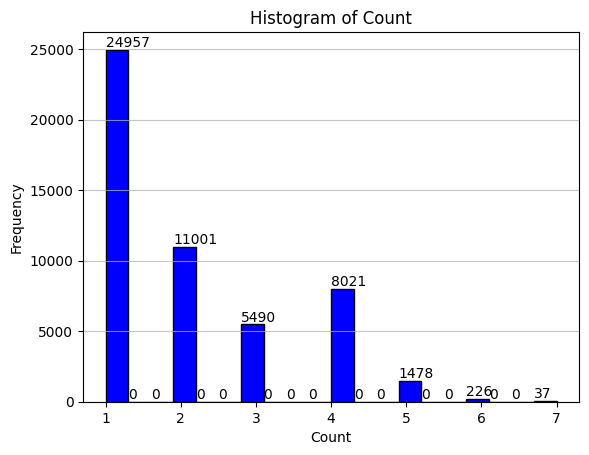

In [8]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column 'Count'
n, bins, patches = plt.hist(df['Count'], bins=20, color='blue', edgecolor='black')  # Adjust bins if necessary

plt.title('Histogram of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Optional: Add grid lines for better readability

# Annotating the top of each bar with the count
for i in range(len(n)):
    plt.text(bins[i], n[i], str(int(n[i])), ha='left', va='bottom')

plt.show()


In [9]:
for col in target_cols:
    df[col] = 0

# Update the DataFrame
for index, row in df.iterrows():
    for category in row['Cat']:
        if category in target_cols:
            df.at[index, category] = 1
df.head()

,Title,Abstract,Categories,Text,Cat,Count,math.AT,stat.AP,cs.AR,math.QA,...,cs.SE,cs.RO,stat.TH,cs.DB,math.ST,q-bio.GN,q-fin.PM,q-bio.TO,math.GR,cs.IR
Id,,,,,,,,,,,,,,,,,,,,,
9707,axiomatic aspect default inference,study axiom nonmonotonic consequence semantics...,['cs.LO'],axiomatic aspect default inference study axiom...,[cs.LO],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24198,extension infinite conjugacy class,characterize infinite conjugacy class icc conj...,['math.GR'],extension infinite conjugacy class characteriz...,[math.GR],1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35766,analysis valued cnns data wireless device clas...,deep neural network device classification stud...,"['cs.LG', 'cs.IT', 'eess.SP', 'math.IT']",analysis valued cnns data wireless device clas...,"[cs.LG, cs.IT, eess.SP, math.IT]",4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14322,reconstruction drift diffusion transition prob...,reconstructing drift diffusion erre geq transi...,"['math.PR', 'math.ST', 'stat.TH']",reconstruction drift diffusion transition prob...,"[math.PR, math.ST, stat.TH]",3,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
709,class propagation rule grs egrs code applicati...,hermitian hull extended generalized reed solom...,"['cs.IT', 'math.IT']",class propagation rule grs egrs code applicati...,"[cs.IT, math.IT]",2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
total_sum = df[target_cols].sum()
sorted_sum = total_sum.sort_values(ascending=True)  # Use ascending=True for ascending order
sorted_sum.head(42)

cs.OS        134
q-bio.TO     177
q-bio.CB     191
q-fin.TR     241
q-bio.GN     257
econ.TH      272
q-fin.GN     272
q-bio.NC     273
q-bio.MN     281
cs.CE        312
q-fin.PM     332
q-bio.BM     394
cs.AR        465
q-fin.RM     475
q-fin.MF     485
q-fin.CP     501
q-fin.PR     524
econ.GN      539
q-fin.EC     548
math.AT      569
stat.CO      575
cs.DM        590
cs.GT        595
math.CV      600
econ.EM      635
cs.DB        792
math.LO      832
math.AC      858
stat.AP      858
cs.PL        984
math.GR      991
cs.SE       1225
cs.LO       1345
cs.IR       1368
cs.DC       1489
cs.NI       1584
stat.ME     1614
eess.IV     1633
math.QA     1657
math.NT     1690
eess.SP     1996
cs.RO       2080
dtype: int64

In [38]:
minority=sorted_sum.iloc[:42].index.to_list()

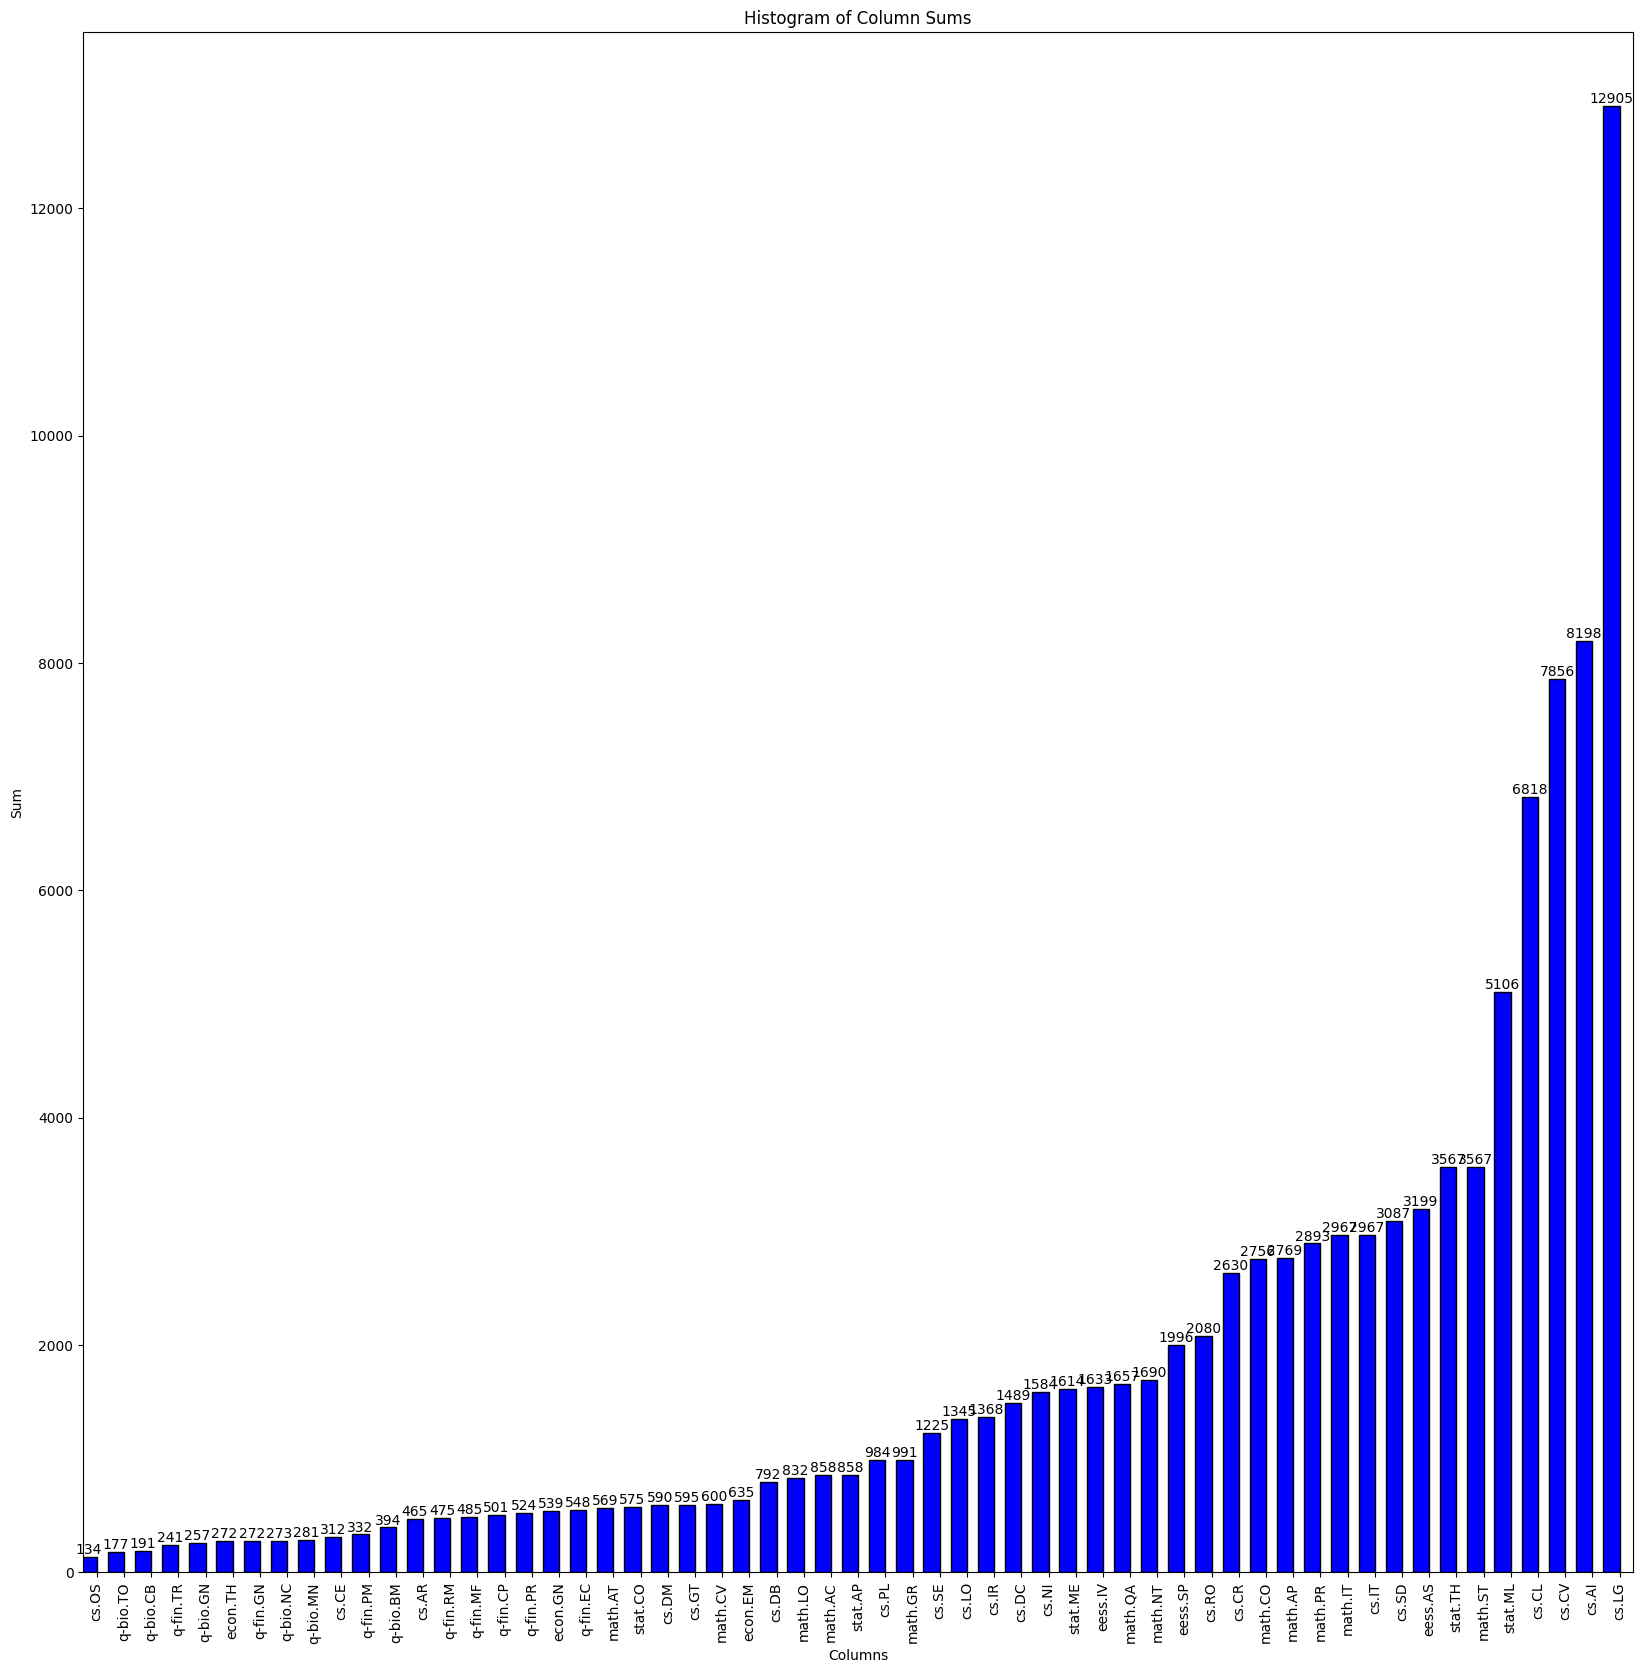

In [39]:
import numpy as np

plt.figure(figsize=(20, 20)) 
# Define bar width and bar spacing
bar_width = 0.6
bar_spacing = 0.2

# Calculate the x position of bars
x_pos = np.arange(len(sorted_sum))

# Create a bar plot
bars = plt.bar(x_pos, sorted_sum.values, color='blue', edgecolor='black', width=bar_width)

plt.title('Histogram of Column Sums')
plt.xlabel('Columns')
plt.ylabel('Sum')

# Rotate x labels for better readability and add more spacing
plt.xticks(x_pos + bar_width / 2, sorted_sum.index, rotation=90)  # Adjust x-ticks to be at the center of the bars

# Annotating the top of each bar with the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Adjust the x-axis limits to add space at the beginning and end
plt.xlim(-bar_spacing, len(x_pos) - 1 + bar_width + bar_spacing)

plt.show()


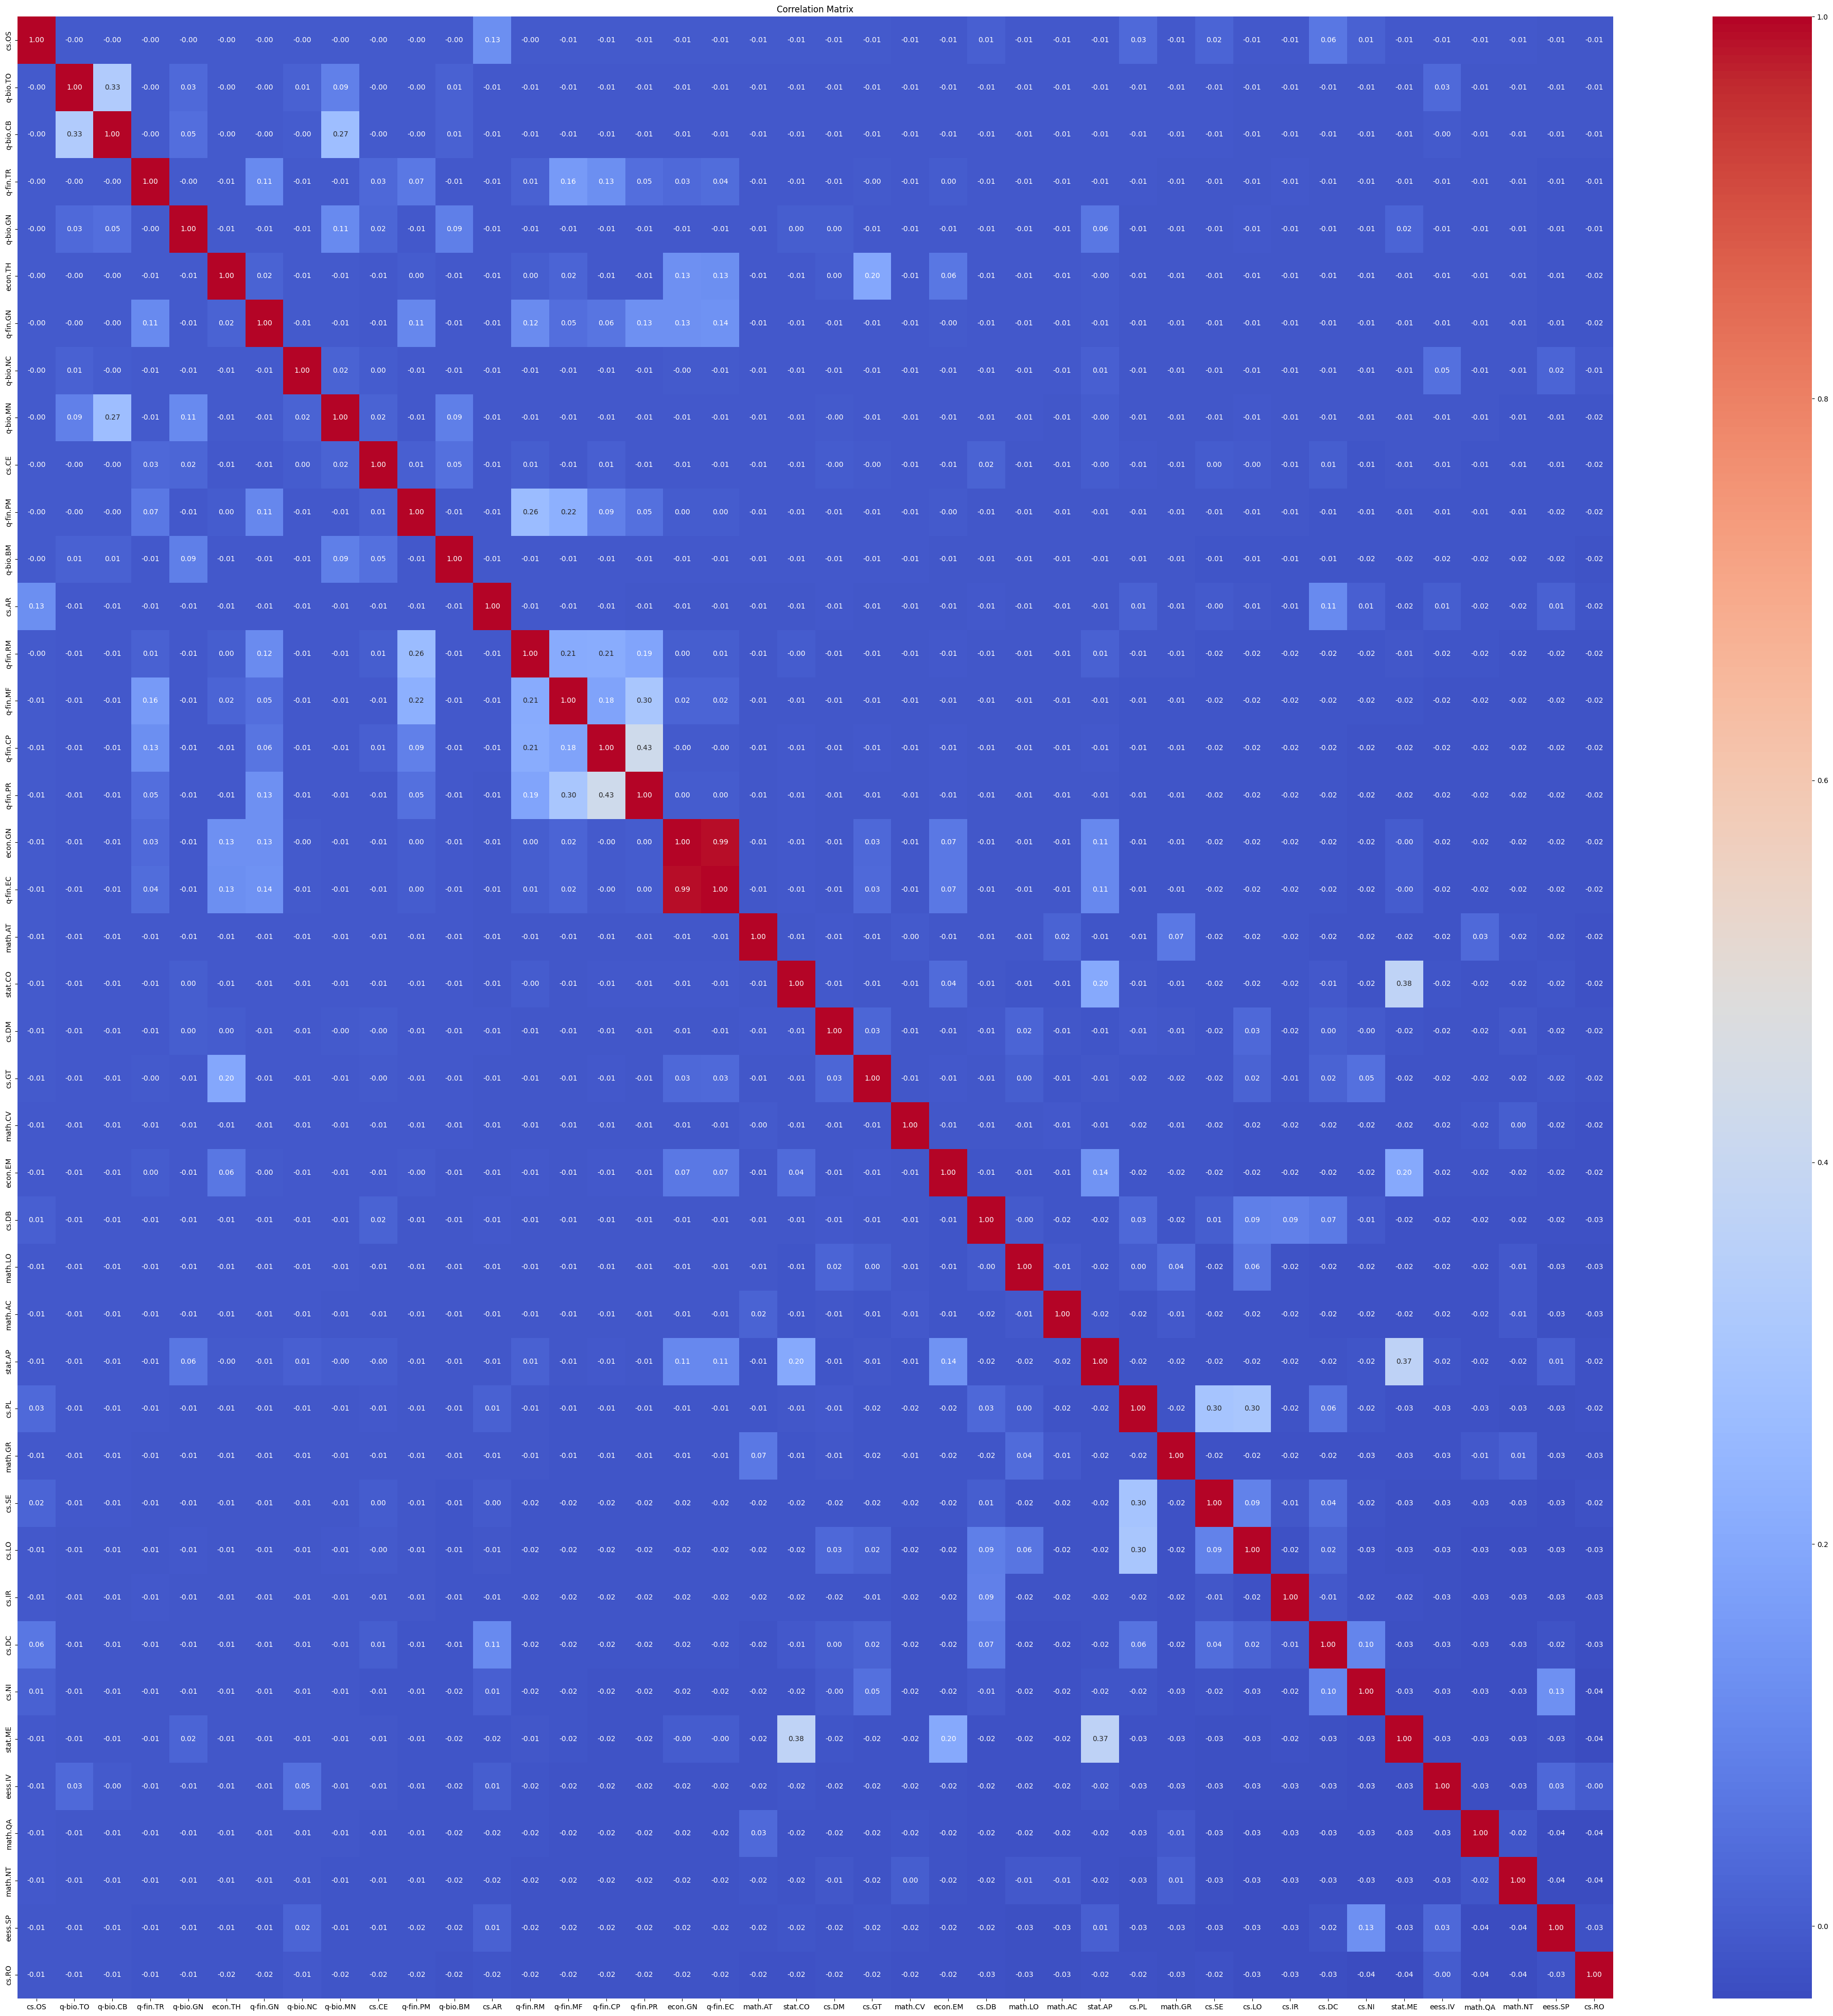

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(50, 50))

# Create the correlation matrix
correlation_matrix = df[minority].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()
